In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = sns.load_dataset('iris')

In [4]:
df.sample(4)

,sepal_length,sepal_width,petal_length,petal_width,species
84,5.4,3.0,4.5,1.5,versicolor
11,4.8,3.4,1.6,0.2,setosa
34,4.9,3.1,1.5,0.2,setosa
72,6.3,2.5,4.9,1.5,versicolor


In [5]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

<Axes: >

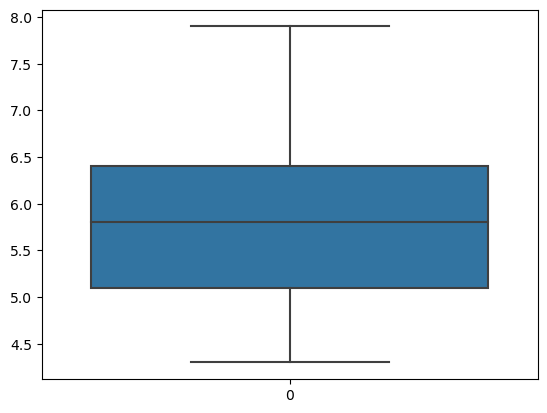

In [8]:
sns.boxplot(df['sepal_length'])

In [11]:
X= df.drop(columns='species')
Y = df['species']

In [12]:
from sklearn.model_selection import train_test_split
X_train , X_test , Y_train ,Y_test =train_test_split(X ,Y ,test_size=0.20,random_state=42)

In [13]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()

In [15]:
LE.fit(Y_train)

LabelEncoder()

In [17]:
Y_train =LE.transform(Y_train)
Y_test = LE.transform(Y_test)

In [19]:
from sklearn.preprocessing import StandardScaler
SD = StandardScaler()

In [20]:
SD.fit(X_train)


StandardScaler()

In [21]:
X_train_scaled = SD.transform(X_train)
X_test_scaled = SD.transform(X_test)

In [22]:
X_train_scaled = pd.DataFrame(X_train_scaled , columns =X_train.columns)

In [23]:
X_test_scaled = pd.DataFrame(X_test_scaled , columns =X_test.columns)

In [24]:
X_train_scaled

,sepal_length,sepal_width,petal_length,petal_width
0,-1.473937,1.203658,-1.562535,-1.312603
1,-0.133071,2.992376,-1.276006,-1.045633
2,1.085898,0.085709,0.385858,0.289218
3,-1.230143,0.756479,-1.218701,-1.312603
4,-1.717731,0.309299,-1.390618,-1.312603
...,...,...,...,...
115,0.354517,-0.585060,0.156636,0.155733
116,-1.108246,-1.255829,0.443164,0.689673
117,-0.011174,2.098017,-1.447923,-1.312603
118,-0.011174,-1.032239,0.156636,0.022248


https://drive.google.com/drive/folders/0Bz9C0ysJZ7PnMGZKeWcybUpXWGM?resourcekey=0-S2yaWXvAG7ObM_GC8LRNTQ 

In [25]:
np.round(X_train_scaled.describe(),1)

,sepal_length,sepal_width,petal_length,petal_width
count,120.0,120.0,120.0,120.0
mean,0.0,0.0,0.0,-0.0
std,1.0,1.0,1.0,1.0
min,-1.8,-2.4,-1.6,-1.4
25%,-0.9,-0.6,-1.3,-1.2
50%,-0.1,-0.1,0.3,0.2
75%,0.7,0.8,0.8,0.8
max,2.3,3.0,1.7,1.8


In [58]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()

In [59]:

from sklearn.metrics import classification_report

In [60]:
clf.fit(X_train, Y_train)

MultinomialNB()

In [61]:
y_pred = clf.predict(X_test)

In [62]:
# Summary of the predictions made by the classifier
print(classification_report(Y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.75      1.00      0.86         9
           2       1.00      0.73      0.84        11

    accuracy                           0.90        30
   macro avg       0.92      0.91      0.90        30
weighted avg       0.93      0.90      0.90        30



In [63]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
conf_matrix = confusion_matrix(Y_test, y_pred)


In [64]:
print("confusion_matrix is :" , conf_matrix)

confusion_matrix is : [[10  0  0]
 [ 0  9  0]
 [ 0  3  8]]


In [65]:
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,Y_test))

accuracy is 0.9


In [66]:
from sklearn.metrics import precision_score
precn_score = precision_score(Y_test, y_pred, average='macro')

In [67]:
print('precision_score is :' ,precn_score )

precision_score is : 0.9166666666666666


In [70]:
recl_score = recall_score(y_pred,Y_test , average='micro')


In [71]:
print("recl_score" ,recl_score)

recl_score 0.9


In [74]:
target_class = 'setosa'  

TP = conf_matrix[0, 0]

# False Positives: cases where the actual class is not 'setosa' but predicted as 'setosa'
FP = conf_matrix[1:, 0].sum()

# False Negatives: cases where the actual class is 'setosa' but predicted as not 'setosa'
FN = conf_matrix[0, 1:].sum()

# True Negatives: cases where the actual class is not 'setosa' and not predicted as 'setosa'
TN = conf_matrix[1:, 1:].sum()

print("True Positives (TP):", TP)
print("False Positives (FP):", FP)
print("True Negatives (TN):", TN)
print("False Negatives (FN):", FN)


True Positives (TP): 10
False Positives (FP): 0
True Negatives (TN): 20
False Negatives (FN): 0
